In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from  tqdm import tqdm

In [2]:
#Train and Test
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((.5, .5, .5), (.5, .5, .5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, shuffle=False, batch_size =4, num_workers = 2)
testset = torchvision.datasets.CIFAR10(root='./data', download=True, train=False, transform = transform)
testloader = torch.utils.data.DataLoader(testset, shuffle = False, batch_size =4 , num_workers = 2) 

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



cuda:0
Files already downloaded and verified
Files already downloaded and verified


In [9]:
def imshow(img):
    img = img/2 + .5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

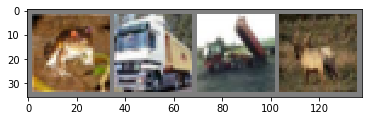

In [10]:
#showing the images
dataiter = iter(trainloader)
images, labels = dataiter.next() 
imshow(torchvision.utils.make_grid(images))

In [11]:
#NN architecture
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [12]:
#loss
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
for epoch in range(1):
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)
print('Finished Training')

[1,  2000] loss: 2.181
[1,  4000] loss: 1.897
[1,  6000] loss: 1.686
[1,  8000] loss: 1.564
[1, 10000] loss: 1.536
[1, 12000] loss: 1.477
Finished Training


In [14]:
#test
dataiter = iter(testloader)
image, label = dataiter.next()
#imshow(torchvision.utils.make_grid(image))

In [15]:
print('Ground Truth:',' '.join(classes[label[j]] for j in range(4)))

Ground Truth: cat ship ship plane


In [17]:
net.load_state_dict(torch.load(PATH))
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)
print('predicted: ',' '.join('%5s' % classes[predicted[j]]
                            for j in range(4)))

predicted:   frog truck truck  deer


In [19]:
correct = 0
total = 0 
with torch.no_grad():
    for data in testloader:
        images, labels = data
        output = net(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()
print('accuracy of the network on the 10000 test images: %d %%' % (100 * correct/total))


accuracy of the network on the 10000 test images: 9 %


In [6]:
!pwd

/home/hlingam
